# Task 2

In [1]:
import numpy as np

# Original V
v = np.array([3.2, -1.4, 2.5, -0.9, 1.8, -3.7, 0.0, 4.0, 2.2, -1.3])

# Given q levels, -4 to 4, 8 values & uniform
q_levels = np.linspace(-4, 4, num=8)
q_levels

array([-4.        , -2.85714286, -1.71428571, -0.57142857,  0.57142857,
        1.71428571,  2.85714286,  4.        ])

In [2]:
def naive_solver(v, q_levels):
    # the naive version of the solver, without any optimization
    q_v = np.zeros_like(v)
    for i in range(len(v)):
        # We choose the level that is closest
        level_index = np.argmin(np.abs(v[i] - q_levels))
        q_v[i] = q_levels[level_index]
    return q_v

naive_solver(v, q_levels)

array([ 2.85714286, -1.71428571,  2.85714286, -0.57142857,  1.71428571,
       -4.        ,  0.57142857,  4.        ,  1.71428571, -1.71428571])

In [3]:
def vectorization_solver(v, q_levels):
    reshaped_v = v.reshape(-1, 1)
    diff = abs(reshaped_v - q_levels)
    idx = np.argmin(diff, axis=1)
    return q_levels[idx]

vectorization_solver(v, q_levels)

array([ 2.85714286, -1.71428571,  2.85714286, -0.57142857,  1.71428571,
       -4.        ,  0.57142857,  4.        ,  1.71428571, -1.71428571])

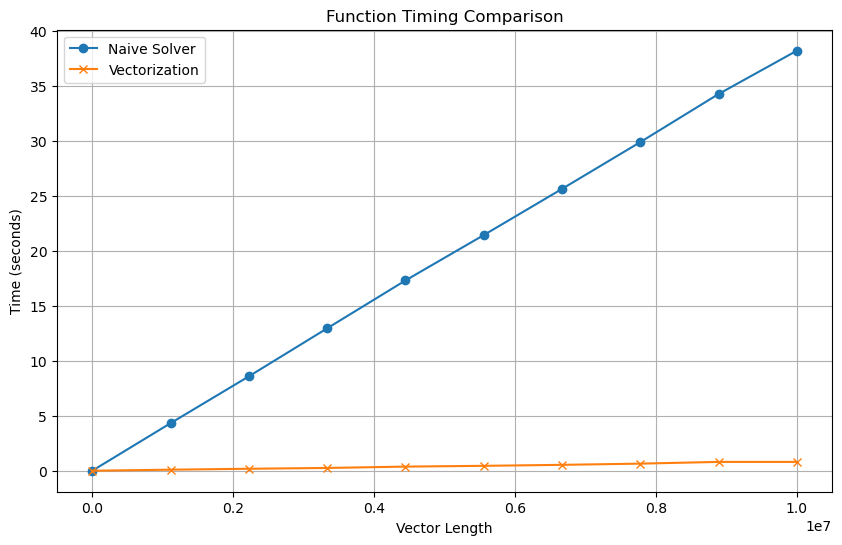

[0.0, 4.320467948913574, 8.578328132629395, 12.94315481185913, 17.29486584663391, 21.419968843460083, 25.6201171875, 29.873976469039917, 34.24585199356079, 38.18588352203369]
[0.0, 0.0939185619354248, 0.17850565910339355, 0.2517516613006592, 0.37333035469055176, 0.4448561668395996, 0.5347378253936768, 0.644383430480957, 0.8018951416015625, 0.8012783527374268]


In [4]:
# Compare the results
import time
import matplotlib.pyplot as plt

def plot_results(lengths, func1_times, func2_times):
    # Plot func
    plt.figure(figsize=(10, 6))
    plt.plot(lengths, func1_times, label='Naive Solver', marker='o')
    plt.plot(lengths, func2_times, label='Vectorization', marker='x')
    plt.xlabel('Vector Length')
    plt.ylabel('Time (seconds)')
    plt.title('Function Timing Comparison')
    plt.legend()
    plt.grid()
    plt.savefig("result.png")
    plt.show()

def record_time(func, v, q_levels):
    # record the time it took to run our func
    start_t = time.time()
    func(v, q_levels)
    return(time.time() - start_t)

# Experiment

lengths = np.linspace(1e3, 1e7, 10)
slow_times = []
fast_times = []
for l in lengths:
    v = np.random.uniform(-4, 4, int(l))
    slow_times.append(record_time(naive_solver, v, q_levels))
    fast_times.append(record_time(vectorization_solver, v, q_levels))
    
plot_results(lengths, slow_times, fast_times)
print(slow_times)
print(fast_times)

# Task 4

In [5]:
from sklearn.cluster import KMeans

v = np.array([3.2, -1.4, 2.5, -0.9, 1.8, -3.7, 0.0, 4.0, 2.2, -1.3])

def task4_solver(V, k=8, n_init=1):
    V = np.array(V).reshape(-1, 1)
    kmeans = KMeans(n_clusters=k, n_init=n_init)
    kmeans.fit(V)
    clusters = kmeans.predict(V)
    means = kmeans.cluster_centers_
    return [means[cluster][0] for cluster in clusters]

task4_solver(v)

[3.2,
 -1.35,
 2.35,
 -0.9,
 1.8000000000000003,
 -3.6999999999999997,
 0.0,
 4.0,
 2.35,
 -1.35]